In [36]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [17]:
# load the dataset
df = sns.load_dataset('iris')
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
84,5.4,3.0,4.5,1.5,versicolor
28,5.2,3.4,1.4,0.2,setosa
81,5.5,2.4,3.7,1.0,versicolor


In [18]:
#df = df.iloc[:, 1:]
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
48,5.3,3.7,1.5,0.2,setosa
103,6.3,2.9,5.6,1.8,virginica
43,5.0,3.5,1.6,0.6,setosa


# Label Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# encoding the 'species' column
# create an object
encoder = LabelEncoder()

In [20]:
# provide the column
df['species'] = encoder.fit_transform(df['species'])
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,1
76,6.8,2.8,4.8,1.4,1
31,5.4,3.4,1.5,0.4,0


# EDA on data

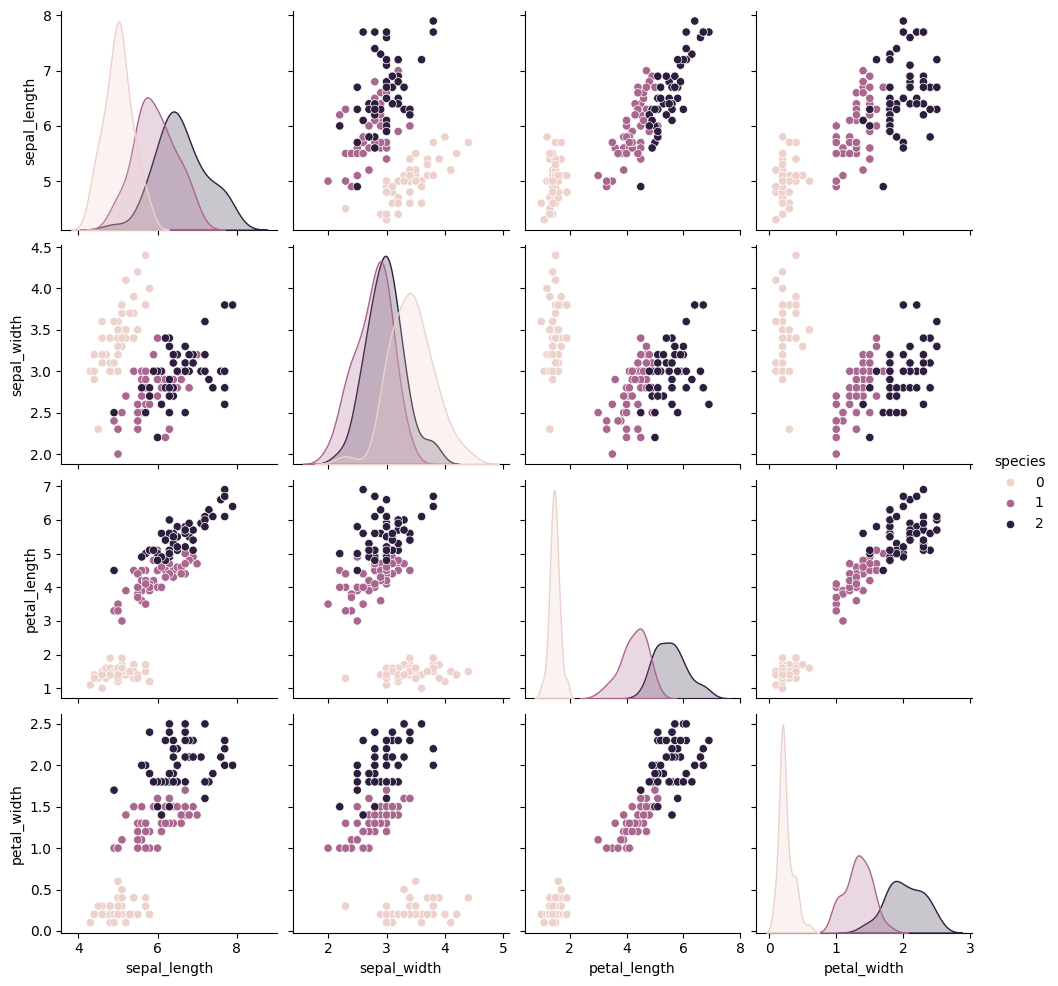

In [21]:
# see the pairplot
sns.pairplot(df, hue='species')

In [22]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
# we only select the petal length and sepal width 
# why
# because to those point are overlapping

new_df =  df[df['species'] !=0][['sepal_width', 'sepal_length', 'species']]
new_df.sample(3)

,sepal_width,sepal_length,species
81,2.4,5.5,1
99,2.8,5.7,1
80,2.4,5.5,1


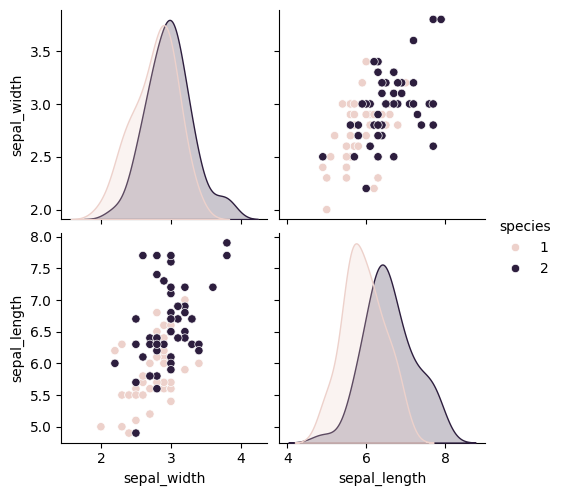

In [26]:
sns.pairplot(new_df, hue='species')

# split the data

In [34]:
# split the data
X = new_df.iloc[:, :2]
y = new_df.iloc[:, -1]


In [35]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


# import more model to train 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [61]:
# create an object of each model
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [62]:
estimators = [('lr', clf1), ('rf', clf2), ('knn', clf3)]
estimators

[('lr', LogisticRegression()),
 ('rf', RandomForestClassifier()),
 ('knn', KNeighborsClassifier())]

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
# check the cross val score of all model
for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print (estimator[0], np.mean(x))

lr 0.75
rf 0.6100000000000001
knn 0.62


# Apply Voting 

In [65]:
from sklearn.ensemble import VotingClassifier

## Hard Voting 

In [66]:
# create an object
vc = VotingClassifier(estimators=estimators, voting='hard')
vc

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier())])

In [67]:
# check the score
x = cross_val_score(vc, X, y, cv=10,scoring='accuracy')
print(np.round(np.mean(x), 2))


0.68


## Soft voting

In [68]:
vc2 = VotingClassifier(estimators=estimators, voting='soft')
vc2

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [69]:
x = cross_val_score(vc2, X, y, scoring='accuracy', cv=10)
print(np.round(np.mean(x), 2))

0.66


# Weighted Voting

In [70]:
estimators

[('lr', LogisticRegression()),
 ('rf', RandomForestClassifier()),
 ('knn', KNeighborsClassifier())]

In [76]:
# how we know which model give the more weight 
# so that overall performance will increase 

for lr in range(1, 4): # lr
    for rf in range(1, 4): # rf
        for knn in range(1, 4): # knn
            # create an object 
            vc = VotingClassifier(estimators=estimators, voting='soft', weights=[lr, rf, knn])
            # calculate  the accuracy
            x = cross_val_score(vc, X, y, cv=10, scoring='accuracy')
            print(f"lr -> {lr} | rf -> {rf} | knn -> {knn}  ==>> Accuracy -> {np.round(np.mean(x), 3)} ")      
            


lr -> 1 | rf -> 1 | knn -> 1  ==>> Accuracy -> 0.64 
lr -> 1 | rf -> 1 | knn -> 2  ==>> Accuracy -> 0.64 
lr -> 1 | rf -> 1 | knn -> 3  ==>> Accuracy -> 0.66 
lr -> 1 | rf -> 2 | knn -> 1  ==>> Accuracy -> 0.64 
lr -> 1 | rf -> 2 | knn -> 2  ==>> Accuracy -> 0.65 
lr -> 1 | rf -> 2 | knn -> 3  ==>> Accuracy -> 0.66 
lr -> 1 | rf -> 3 | knn -> 1  ==>> Accuracy -> 0.61 
lr -> 1 | rf -> 3 | knn -> 2  ==>> Accuracy -> 0.6 
lr -> 1 | rf -> 3 | knn -> 3  ==>> Accuracy -> 0.62 
lr -> 2 | rf -> 1 | knn -> 1  ==>> Accuracy -> 0.67 
lr -> 2 | rf -> 1 | knn -> 2  ==>> Accuracy -> 0.67 
lr -> 2 | rf -> 1 | knn -> 3  ==>> Accuracy -> 0.67 
lr -> 2 | rf -> 2 | knn -> 1  ==>> Accuracy -> 0.66 
lr -> 2 | rf -> 2 | knn -> 2  ==>> Accuracy -> 0.66 
lr -> 2 | rf -> 2 | knn -> 3  ==>> Accuracy -> 0.65 
lr -> 2 | rf -> 3 | knn -> 1  ==>> Accuracy -> 0.63 
lr -> 2 | rf -> 3 | knn -> 2  ==>> Accuracy -> 0.63 
lr -> 2 | rf -> 3 | knn -> 3  ==>> Accuracy -> 0.64 
lr -> 3 | rf -> 1 | knn -> 1  ==>> Accuracy -> 

# Classifier of same algorithm

In [77]:
from sklearn.svm import SVC

In [78]:
# make a toy dataset
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1_000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    random_state=2
)

In [ ]:
# create an same model object with different parameters
svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

In [82]:
estimators = [('s1', svm1 ), ('s2', svm2), ('s3', svm3), ('s4', svm4), ('s5', svm5)]
estimators

[('s1', SVC(degree=1, kernel='poly', probability=True)),
 ('s2', SVC(degree=2, kernel='poly', probability=True)),
 ('s3', SVC(kernel='poly', probability=True)),
 ('s4', SVC(degree=4, kernel='poly', probability=True)),
 ('s5', SVC(degree=5, kernel='poly', probability=True))]

In [85]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.92


In [87]:
# calculate the accuracy
for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(x), 2))

s1 0.89
s2 0.79
s3 0.92
s4 0.81
s5 0.92


- 17:10 IST
- 15/06/2025